# LOAN DATASET [ KAGGLE ] - DECISION TREE

### Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing ML Libraries for DECISION TREE

In [21]:
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Importing Data

In [3]:
path = "C:/Users/miihi/Data/DecodR/Decision Tree/loan_data_final.csv"
loan = pd.read_csv(path)
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,all_other,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### Understanding data

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Data Preprocessing

Checking if the column names have any undesirable spaces and removing them and also converting column names into lowercase if any in the upper case

In [6]:
loan = loan.rename(columns= lambda x : x.strip().lower())
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
loan.purpose.unique()

array(['debt_consolidation', 'all_other', 'small_business', 'educational'],
      dtype=object)

# CREATING DUMMIES

From above Describe function we can understand 'purpose' is a categorical column having 4 distinct categories: 'debt_consolidation', 'all_other', 'small_business', 'educational'.

So we create dummies for the purpose column to convert the categories into numerirc variable.

this can be done using Pandas by syntax

**pd.get_dummies(prefix = 'col_name', data = df_name, columns = ['col_name'])**

In [8]:
loan = pd.get_dummies(prefix="purpose", data = loan, columns=['purpose'], drop_first= True)
loan.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_small_business'],
      dtype='object')

After creating the dummies using Pandas 4 additional columnns have benn added to the dataframe and original 'purpose' column has been removed by Pandas

# Exploratory Data Analysis

### Checking for nulls

In [9]:
print("\t\t\tNumber of NA values\n",loan.isna().sum())

			Number of NA values
 credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_debt_consolidation    0
purpose_educational           0
purpose_small_business        0
dtype: int64


### Shape of the Data

In [10]:
print("Dimensions of the data: {} Rows and {} Columns".format(loan.shape[0], loan.shape[1]))

Dimensions of the data: 9578 Rows and 16 Columns


### Plotting the given data using CountPlot

With this we can check if the data is Balanced or Unbalanced

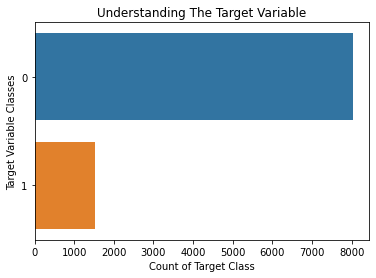

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(y = loan['not.fully.paid'], data = loan)
plt.xlabel("Count of Target Class")
plt.ylabel("Target Variable Classes")
plt.title("Understanding The Target Variable")
plt.show()

It's a case of perfect Imbalance in the target variable classes

### Checking the Distribution of each variable in the data

To identify is the data is normally distributed or skewed we use histogram

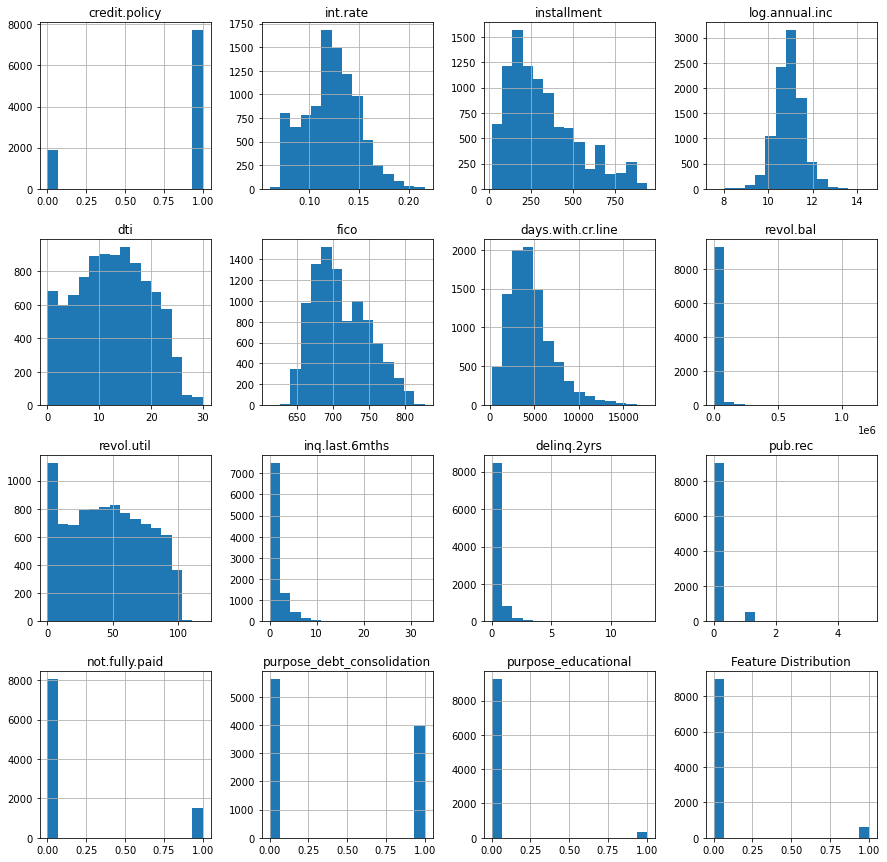

In [12]:
loan.hist(figsize= (15,15), bins=15)
plt.title("Feature Distribution")
plt.show()

### Checking Multicollinearity among the variables

Using HEATMAP

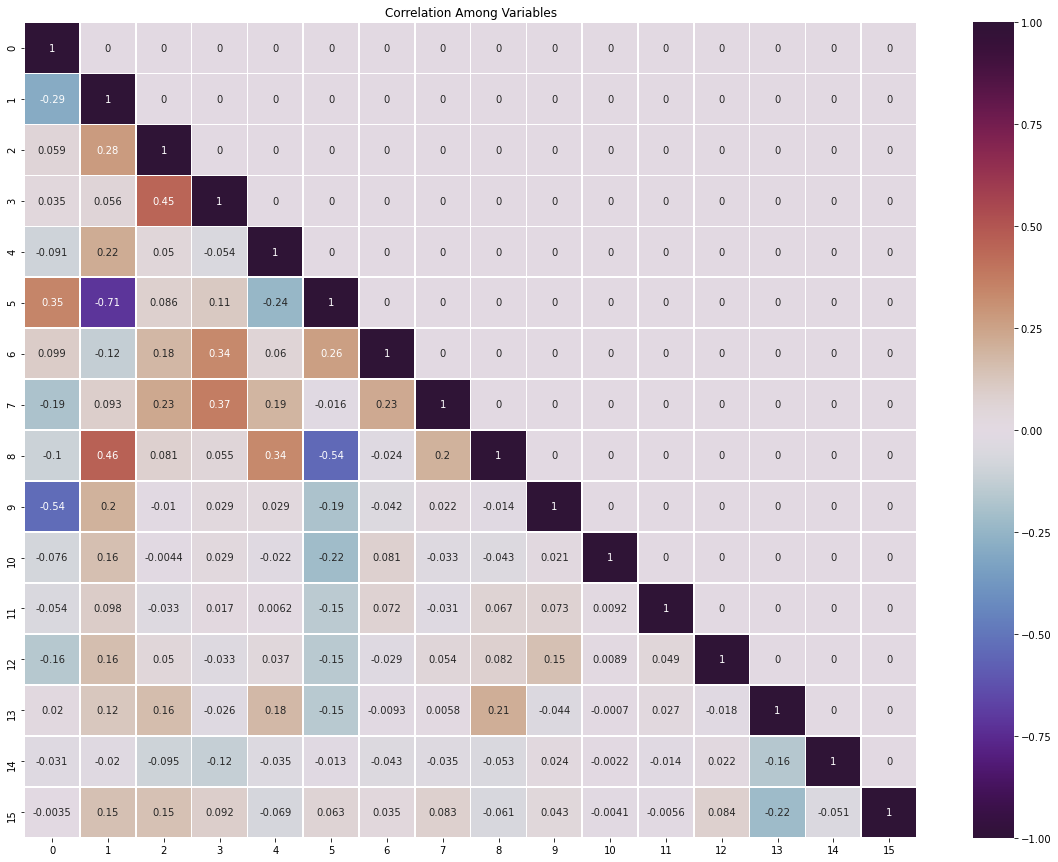

In [17]:
plt.figure(figsize=(20,15))
cor = loan.corr()
cor = np.tril(cor)
sns.heatmap(data = cor, vmin = -1, vmax=1, linecolor="white", linewidths=0.5, annot=True,
           cmap = 'twilight_shifted')
a = plt.title("Correlation Among Variables", )

" int.rate " And " fico "  have a Moderate Negative Correlation (-0.71)

'purpose_all_other'  and  'purpose_debt_consolidation' have a High Negative Correlation (-0.82)


### Seperating the variables

In [18]:
y = loan[['not.fully.paid']]

loan = loan.drop(['not.fully.paid'], axis = 1)

x = loan[ : ]

print("x has {} rows and {} columns".format(x.shape[0], x.shape[1]))
print('\n')
print("y has {} rows and {} columns".format(y.shape[0], y.shape[1]))

x has 9578 rows and 15 columns


y has 9578 rows and 1 columns


#### Splitting the vatiables in training and testing data

In [19]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


### Model Building

## Decision tree with Criterion - GINI INDEX

In [17]:
classifier = DecisionTreeClassifier(criterion='gini', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score with gini index:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1975  417]
 [ 371  111]]
Accuracy Score with gini index: 0.7258176757132916
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.83      0.83      2392
           1       0.21      0.23      0.22       482

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.73      2874



## Decision tree with Criterion - ENTROPY

In [19]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score with entropy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2034  358]
 [ 390   92]]
Accuracy Score with entropy: 0.7397355601948504
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.20      0.19      0.20       482

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.73      0.74      0.74      2874



### handling the class imbalance

The class 1 in the target variable is highly imbalanced, so we ned to it by oversampling

In [1]:

!pip install imblearn


In [26]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

In [33]:
y_ros.value_counts()

not.fully.paid
1                 8045
0                 8045
dtype: int64

In [34]:
# train and test split with ros variables

x_train,x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size= 0.3, random_state=100)

## Decision tree with Criterion - GINI INDEX

In [22]:
classifier = DecisionTreeClassifier(criterion='gini', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score with gini index:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2000  392]
 [ 367  115]]
Accuracy Score with gini index: 0.7359081419624217
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2392
           1       0.23      0.24      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



## Decision tree with Criterion - ENTROPY

In [23]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy Score with entropy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2061  331]
 [ 391   91]]
Accuracy Score with entropy: 0.7487821851078637
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.86      0.85      2392
           1       0.22      0.19      0.20       482

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.75      0.74      2874



# GRID SEARCH

In [24]:
dt_classifier = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[10, 15, 20, 30, 40, 50]}

grid = GridSearchCV(dt_classifier, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.828 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.823 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.818 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.805 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.823 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=15;, score=0.788 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=15;, score=0.799 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=15;, score=0.790 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=15;, score=0.787 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=15;, score=0.780 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=20;, score=0.746 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=20;

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40, 50]},
             verbose=3)

In [25]:
## best parameters after hyper parameter tuning

print(grid.best_params_)

## Model parameters
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=10)


### Prediction using the best parameters

In [30]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dt_classifier.fit(x_test, y_test)
grid_prediction = dt_classifier.predict(x_test)

# classification report
print("Confusion Matrix:\n",confusion_matrix(y_test, grid_prediction))
print("Accuracy Score with entropy:", accuracy_score(y_test, grid_prediction))
print("Classification Report:", classification_report(y_test, grid_prediction))

Confusion Matrix:
 [[2321   71]
 [ 237  245]]
Accuracy Score with entropy: 0.8928322894919972
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2392
           1       0.78      0.51      0.61       482

    accuracy                           0.89      2874
   macro avg       0.84      0.74      0.78      2874
weighted avg       0.89      0.89      0.88      2874



##### Plotting the decision tree


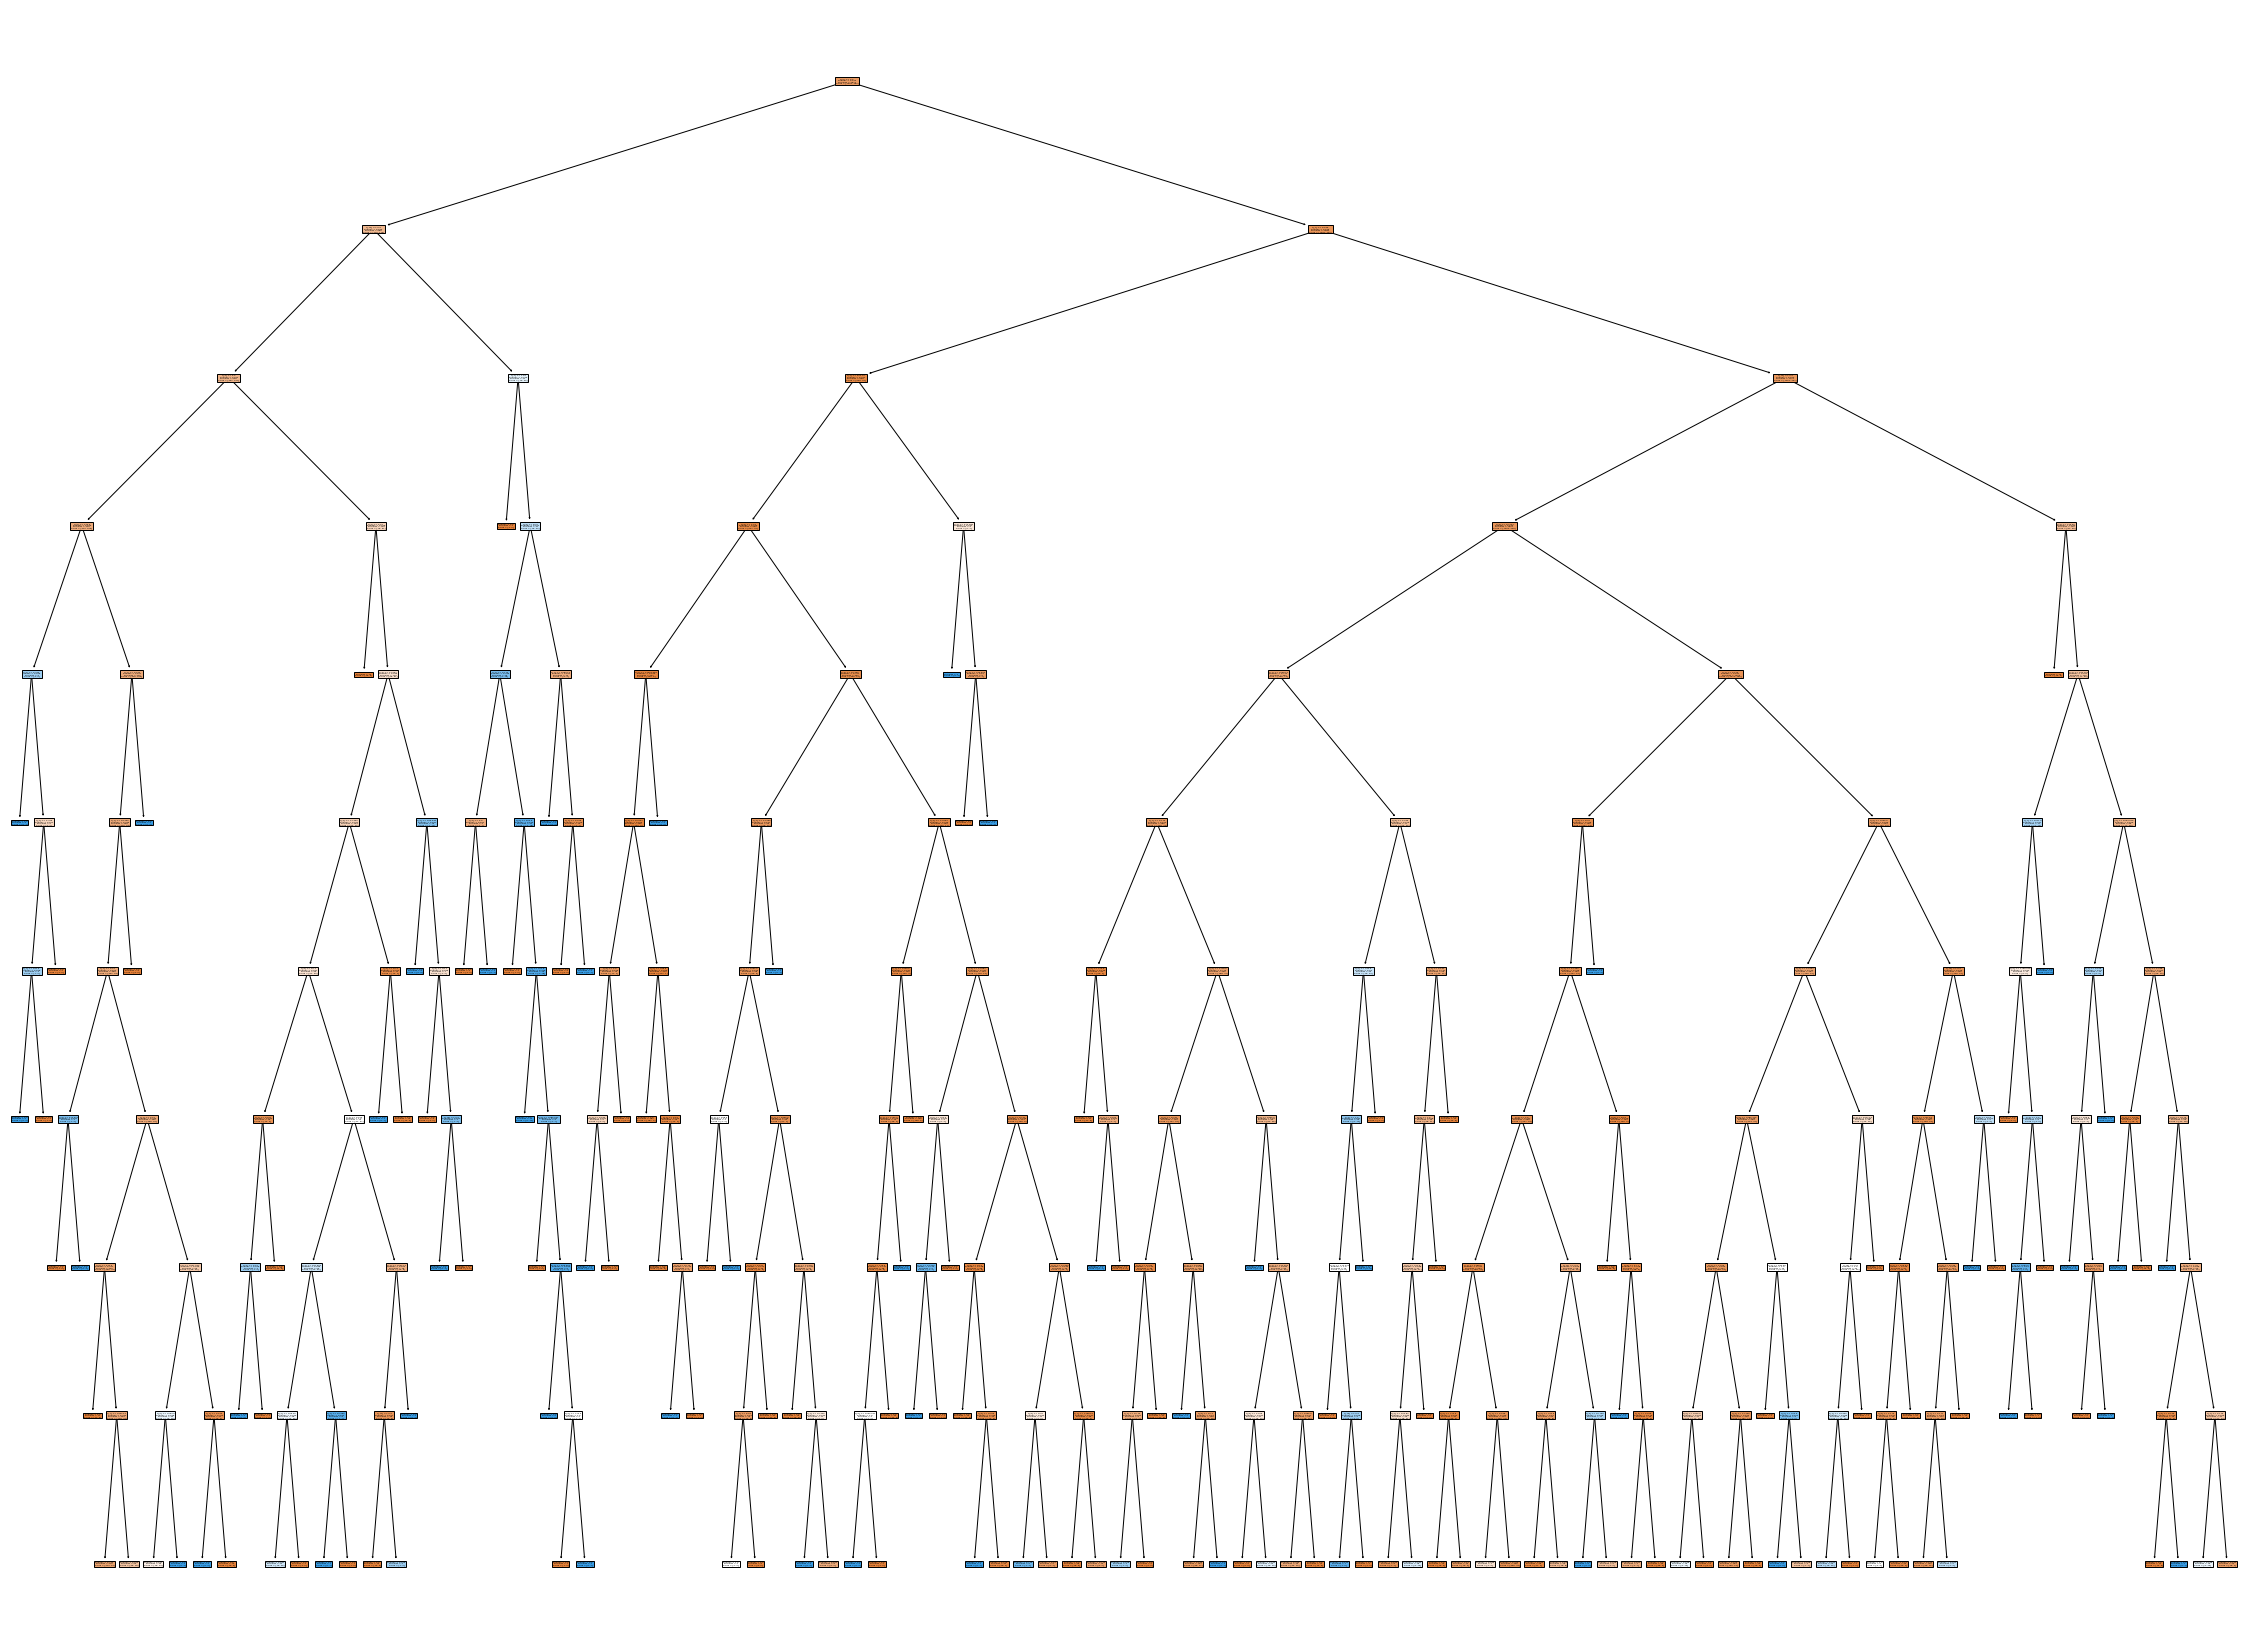

In [33]:
plt.figure(figsize=(40, 30))
tree.plot_tree(dt_classifier, filled= True)
plt.show()

In [35]:
print(tree.export_text(dt_classifier))

|--- feature_0 <= 0.50
|   |--- feature_14 <= 0.50
|   |   |--- feature_9 <= 5.50
|   |   |   |--- feature_6 <= 340.00
|   |   |   |   |--- feature_3 <= 9.80
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  9.80
|   |   |   |   |   |--- feature_4 <= 2.43
|   |   |   |   |   |   |--- feature_7 <= 287.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  287.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  2.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  340.00
|   |   |   |   |--- feature_1 <= 0.19
|   |   |   |   |   |--- feature_4 <= 28.30
|   |   |   |   |   |   |--- feature_4 <= 0.25
|   |   |   |   |   |   |   |--- feature_6 <= 674.02
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  674.02
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.25
|   |   |   |   |   |   |   |--- feature_1 <= 0.16
